<a href="https://colab.research.google.com/github/iamMchoi/Probability-Statistics/blob/master/Boosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Boosting
#### Implementing Adaptive Boosting with a simple classifier

---------------------------------------

### Assignment Contents:
- [Building a Simple Classifier](#Building-a-Simple-Binary-Tree-Classifier)
- [Building Adaptive Boosting](#Building-Adaptive-Boosting)
- [Census Data](#Census-Data)
- [AdaBoost in `sklearn`](#sklearn)

#### EXPECTED TIME: 4 HRS

### Overview
This assignment extends the work done in Assignment 6 with Random Forests.  

Initially the assignment is theory heavy, both a simple classifier and an adaptive boosting model will be built from scratch. This will primarily involve creating `Python` implementations of the algorithms found in lectures, both this week and last week. As usual, pre-built versions of these algorithms will be demonstrated at the end of the lesson.  
Building the algorithms from scratch help to ensure depth of theoretical knowledge before allowing `Python` and its packages to handle the heavy lifting.

### Activities in this Assignment
- Create a simple Classifier
    - Find potential splits in data
    - Find the best split according to entropy
    - Create binary predictions given a chosen split
- Create an Adaptive Boosting Algorithm
    - Create Weights
    - Calculate Epsilon and Alph
    - Update Weights
   
- Use Adaptive Boosting to Create Predictions on Census Data

#### Imports

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Building a Simple Binary Tree Classifier

Below, pseudo-code for a simple binary tree classifier class is provided.  

The structure of this pseudo-code mimics the structure of the `sklearn` classifiers in that it creates "fit" and "predict" methods.  

In [0]:
class Simple_Binary(object):
    
    def __init__(self):
        pass
    
    def fit(self, X,y):
        """
            1. Find best split in X
                - According to entropy
            2. After finding split, assign:
                - self.col_idx
                - self.split_value
                - self.left_pred
                - self.right_pred
        """
        pass
    
    def predict(self, X):
        """
            1. Make predictions given values calculated
                in the `.fit(X,y)` method.
            2. return predictions as numpy array.
        """
        pass

Instead of building a class like `sklearn`, our `.fit()` and `.predict()` methods will be written as independent `simple_binary_tree_fit()` and `simple_binary_tree_predict()` functions.

In `simple_binary_tree_fit`, **3 steps** must be accomplished:  

1. Find all of the potential values for splitting.
2. Find the column and split_value that results in the lowest entropy.
3. Given that "best split", determine which predictions should be made when data is "<=" and ">" that split value.  

The below provides framework for returning the column and split value that yeilds the lowest entropy, and the predictions indicated by that split.  
After correctly defining `find_splits()`, `ent_from_split()`, and `pred_from_split()` -- marked with "`### <------`" -- the `simple_binary_tree_fit()` function should work.  

In [0]:
def simple_binary_tree_fit(X,y):
    """
    
    Positional arguments -
        X -- a numpy array of numeric observations:
            Assume rows are separate observations, columns are features
        y -- a numpy array of binary labels:
            *Assume labels are 1 for "True" and 0 for "False"*
            
    1. Find best split in X
        - According to entropy
    2. After finding split, return:
        - col_idx - index of column used to split data
        - split_value - value upon which data is split
        - left_pred - The prediction for observation <= split_value
        - right_pred - The prediciton for observation > split_value
        
    """
    
    # create variable "best_split" which will hold:
    # (col_number, split_value, entropy)
    best_split = (-1,-1,1)
    
    # loop through each column in X, keeping track of the column index.
    # # # Note, taking the transpose of X -- X.T -- yeilds columns in this "for" loop
    for col_idx, col in enumerate(X.T):
        
        # Find potential split values within column using `find_splits(col)`
        splits = find_splits(col) ### <------
        
        # For each split, calculate entropy
        for s in splits:
            entropy = ent_from_split(col, s, y) ### <------
            
            # Check if calculated entropy is less than previous "best"
            if ent < best_split[2]:
                best_split = (col_idx, s, ent)
    
    # Now, the "best split" has been found.
    # create "left" and "right" predictions for the best_split
    # The "left" predictions is for when `observation` <= `split_value`
    # The "right" prediction is for when `observation` > `split_value`
    # Each prediction will either be 1 for "True" or 0 for "False"
    
    left_pred, right_pred = pred_from_split(X, y, *best_split[:2]) ### <------
    
    col_idx, split_value = best_split[:2]
    
    # return:
    # - the index of the column to split on.
    # - the value to split that column on
    # - the prediction for rows with observations in that column less than or equal to the split
    # - the prediction for rows with observations in that column greater than the split
    
    return col_idx, split_value, left_pred, right_pred

#### Question 1

Build the `find_splits()` method.

In [0]:
### GRADED
### Code a function called `find_splits`.
### ACCEPT a 1-dimensional numpy array as input.
### RETURN a numpy.array of "split values"

### "Split values" are the mid-points between the values in the sorted list of unique values.

### e.g., Input of np.array([1, 3, 2, 3, 4, 6])
### Yields a sorted-unique list of: np.array([1, 2, 3, 4, 6])
### Then the "splits" in between those values will be: np.array([1.5, 2.5, 3.5, 5])

### YOUR ANSWER BELOW

def find_splits(col):
    """
    Calculate and return all possible split values given a column of numeric data
    
    Positional argument:
        col -- a 1-dimensional numpy array, corresponding to a numeric
            predictor variable.
    
    Example:
        col = np.array([0.5, 1. , 3. , 2. , 3. , 3.5, 3.6, 4. , 4.5, 4.7])
        splits  = find_splits(col)
        print(splits) # --> np.array([0.75, 1.5, 2.5, 3.25, 3.55, 3.8, 4.25, 4.6])
        
    """
    # Sort list of unique values
    srt = np.sort(np.unique(col))
    #sort_data: [0.5 1.  2.  3.  3.5 3.6 4.  4.5 4.7]
      
    list_data=[i for i in srt_data]
    splits = np.mean(np.array((list_data[:-1],list_data[1:])), axis=0)
    
    return splits

In [0]:
#
# AUTOGRADER TEST - DO NOT REMOVE
#


#### Equation for Entropy for binary classification at binary split:
The entropy at a node containing only two classes is calculated by:

$Entropy(node) = -p_{class1}*log_2(p_{class1}) + -p_{class2}*log_2(p_{class2})$  

Suppose a node contains the observations [1,0,1,1]. Then:  

$Entropy(node) = -p_{class1}*log_2(p_{class1}) + -p_{class2}*log_2(p_{class2})$  

$\ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ = -.75*log_2(.75) + -.25*log_2(.25)$

$\ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ = .311 + .5$

$\ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \approx .811$  


This calculation is already programmed into the supplied `entropy()` function below.  

In [0]:
def entropy(class1_n, class2_n):
    # If all of one category, log2(0) does not exist,
    # and entropy = 0
    if (class1_n == 0) or (class2_n == 0):
        return 0

    # Find total number of observations 
    total = class1_n + class2_n
  
    # find proportion of both classes
    class1_proprtion = class1_n/total
    class2_proportion = class2_n/total

    # implement entropy function
    return  sum([-1 * prop * np.log2(prop)
                 for prop in [class1_proprtion, class2_proportion] ])

print(entropy(3,1))

0.8112781244591328


The entropy of a split is:  
$Entropy(split) = p_{node1} * Entropy(node1)+ p_{node2}* Entropy(node2)$  


Where $p_{node}$ is the proportion of observations at that node

Suppose:  
Node 1 contains the observations - [1,0,1,1]  
Node 2 contains the observations - [0,0,0,1,1,0]

Then:  
$Entropy(split) = p_{node1} * Entropy(node1)+ p_{node2}* Entropy(node2)$  

$\ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ = .4 *Entropy(node1) + .6 * Entropy(node2)$

--------------------------------  

For our purposes, the two classes in each node will be defined by:
1. Observations with values less than or equal to the split value  
2. Observations with values greater than the split value.

#### Question 2

In [0]:
### GRADED
### Code a function called `ent_from_split`
### ACCEPT three inputs:
### 1. A numpy array of values
### 2. A value on which to split the values in the first array, (into two groups; <= and >)
### 3. Labels for the observations corresponding to each value in the first array.
### ### Assume the labels are "0"s and "1"s

### RETURN the entropy resulting from that split: a float between 0 and 1.

### Feel free to use the `entropy()` function defined above
### YOUR ANSWER BELOW

def ent_from_split(col, split_value, labels):
    
    """
    Calculate the entropy of a split.
    
    Positional arguments:
        col -- a 1-dimensional numpy array, corresponding to a numeric
            predictor variable.
        split_value --  number, defining where the spliting should occur
        labels -- a 1-dimensional numpy array, corresponding to the class
            labels associated with the observations in `col`.
            assume they will be "0"s and "1"s
    Example:
        col = np.array([1,1,2,2,3,3,4])
        split = 2.5
        labels = np.array([0,1,0,0,1,0,1])
        
        ent = ent_from_split(col, split, labels)
        
        print(ent) # --> 0.8571428571428571
    
    """
    # subset labels by observations that are <= / > the split value
    le_node = labels[col <= split_value]   #le node: [0 1 0 0]
    ri_node = labels[col > split_value]    #g node: [1 0 1]
  
  
    # count members of each class at each node
    # c1 corresponds to "1's"  / c2 corresponds to "0's
    le_c1 = np.count_nonzero(le_node)
    le_c2 = len(le_node) - le_c1
    ri_c1 = np.count_nonzero(ri_node)
    ri_c2 = len(ri_node) - ri_c1
  
    # calculate proportion of total at each node
    total = len(col)
    p_le = (le_c1 + le_c2) / total
    p_ri  =(ri_c1 + ri_c2) / total
  
    # implement entropy calculation
    return (p_le * entropy(le_c1, le_c2)) + (p_ri * entropy(ri_c1, ri_c2))

In [0]:
col = np.array([1,1,2,2,3,3,4])
split = 2.5
labels = np.array([0,1,0,0,1,0,1])

def ent_from_split(col, split_value, labels):
  
  
  # subset labels by observations that are <= / > the split value
  le_node = labels[col <= split_value]   #le node: [0 1 0 0]
  ri_node = labels[col > split_value]    #g node: [1 0 1]
  
  
  # count members of each class at each node
  # c1 corresponds to "1's"  / c2 corresponds to "0's
  le_c1 = np.count_nonzero(le_node)
  le_c2 = len(le_node) - le_c1
  ri_c1 = np.count_nonzero(ri_node)
  ri_c2 = len(ri_node) - ri_c1
  
  # calculate proportion of total at each node
  total = len(col)
  p_le = (le_c1 + le_c2) / total
  p_ri  =(ri_c1 + ri_c2) / total
  
  # implement entropy calculation
  return (p_le * entropy(le_c1, le_c2)) + (p_ri * entropy(ri_c1, ri_c2))

        
ent = ent_from_split(col, split, labels)
        
print(ent) # --> 0.8571428571428571
    

NameError: ignored

In [0]:
#
# AUTOGRADER TEST - DO NOT REMOVE
#


#### Question 3

Creating predictions from the observed majority class at each node.

In [0]:
### GRADED
### Code a function called `pred_from_split`
### ACCEPT four inputs:
### 1. a numpy array of observations
### 2. a numpy array of labels: 0's and 1's
### 3. a column index
### 4. a value to split that column specified by the index

### RETURN a tuple of (left_pred, right_pred) where:
### left_pred is the majority class of labels where observations are <= split_value
### right_pred is the majority class of labels where observations are > split_value

### If the split yeilds equal number of observations of each class in BOTH nodes,
### ### let both `left_pred` and `right_pred` be 1.
### If the split yeilds equal number of observations of each class in ONLY ONE node,
### ### predict the opposite of the other node. e.g.

### ### node 1    |   node 2
### ###  c1  | c2 |  c1 | c2
### ###  5  | 4   |  3  |  3

### The prediction for node 1 would be "class 1".
### Because of the equal numbers of each class in node 2,
### the prediction for node 2 would be the opposite of the node 1 prediction.
### e.g. the prediction for node 2 would be "class 2"

### YOUR ANSWER BELOW

def pred_from_split(X, y, col_idx, split_value):
    
    """
    Return predictions for the nodes defined by the given split.
    
    Positional argument:
        X -- a 2-dimensional numpy array of predictor variable observations.
            rows are observations, columns are features.
        y -- a 1-dimensional numpy array of labels, associated with observations
             in X.
        col_idx -- an integer index, such that X[:,col_idx] yeilds all the observations
            of a single feature.
        split_value -- a numeric split, such that the values of X[:,col_idx] that are
            <= split_value are in the left node. Those > split_value are in the right node.
    
    Example:
        X = np.array([[0.5, 3. ], [1.,  2. ], [3.,  0.5],
                      [2.,  3. ], [3.,  4. ]])
            
        y = np.array([ 1, 1, 0, 0, 1])
        
        col_idx = 0
        
        split_value = 1.5
        
        pred_at_nodes = pred_from_split(X, y, col_idx, split_value)
        print(pred_at_nodes) # --> (1, 0)

    """
    
    left_pred = 0   # "1" <-- equal number all class in Both Nodes or "class 1 or class2" <-- equal number of each class in Only One node
    right_pred = 0  # "1" or "class 2 or class1"
    
    return (left_pred, right_pred)

In [0]:
X = np.array([[0.5, 3. ], [1.,  2. ], [3.,  0.5], [2.,  3. ], [3.,  4. ]])
y = np.array([ 1, 1, 0, 0, 1])
col_idx = 0
split_value = 1.5

def pred_from_split(X, y, col_idx, split_value):
  
  col = X[:,col_idx]
    
  # subset labels by observations that are <= / > the split value
  le_node = y[col <= split_value]   #le node: [0 1 0 0]
  ri_node = y[col > split_value]    #ri node: [1 0 1]
  
  
  # count members of each class at each node
  # c1 corresponds to "1's"  / c2 corresponds to "0's
  le_c1 = np.count_nonzero(le_node)
  le_c2 = len(le_node) - le_c1
  ri_c1 = np.count_nonzero(ri_node)
  ri_c2 = len(ri_node) - ri_c1
  
  # if more of class 1 than class 2, return True (1)
  # if more of class 2 than class 1, return False (0)
  # if equal number, return None
  
  if   le_c1 > le_c2 : left =True 
  elif le_c1 < le_c2 : left =False
  else:                left = None
    
  if   ri_c1 > ri_c2 : right =True 
  elif ri_c1 < ri_c2 : right =False
  else:                right = None
    
  # Check predictions for ties
  # Check to see if one of the predictions came back as "None"
  if ((right == None) or (left == None)) and (right != left):
    if left == None:
      left = not right
    else:
      right = not left
      
  # Check to see if both predictions came back as "None"
  if (right == None) and (left == None):
    right = True; left = True
    
  # Convert predictions to integers, and return as tuple
  return (int(left), int(right))

    
  
pred_at_nodes = pred_from_split(X, y, col_idx, split_value)
print(pred_at_nodes) # --> (1, 0)


(1, 0)


In [0]:
#
# AUTOGRADER TEST - DO NOT REMOVE
#


#### Question 4
Creating Predictions

In [0]:
### GRADED
### Code a function called "simple_binary_tree_predict"
### ACCEPT five inputs:
### 1. A numpy array of observations
### 2. A column index
### 3. A value to split the column specified by the index
### 4/5. Two values, 1 or 0, denoting the predictions at left and right nodes

### RETURN a numpy array of predictions for each observation

### Predictions are created for each row in x:
### 1. For a row in X, find the value in the "col_idx" column
### 2. Compare to "split_value"
### 3. If <= "split_value", predict "left_pred"
### 4. Else predict "right_pred"

### YOUR ANSWER BELOW

def simple_binary_tree_predict(X, col_idx, split_value, left_pred, right_pred):
    """
    Create an array of predictions built from: observations in one column of X,
        a given split value, and given predictions for when observations
        are less-than-or-equal-to that split or greater-than that split value
        
    Positional arguments:
        X -- a 2-dimensional numpy array of predictor variable observations.
            rows are observations, columns are different features
        col_idx -- an integer index, such that X[:,col_idx] yeilds all the observations
            in a single feature.
        split_value -- a numeric split, such that the values of X[:,col_idx] that are
            <= split_value are in the left node, and those > are in the right node.   
        left_pred -- class (0 or 1), that is predicted when observations
            are less-than-or-equal-to the split value
        right_pred -- class (0 or 1), that is predicted when observations
            are greater-than the split value
            
    Example:
        X = np.array([[0.5, 3. ], [1.,  2. ], [3.,  0.5],
                [2.,  3. ], [3.,  4. ]])
        col_idx = 0
        split_value = 1.5
        left_pred = 1
        right_pred = 0

        preds = simple_binary_tree_predict(X, col_idx, split_value, left_pred, right_pred)

        print(preds) #--> np.array([1,1,0,0,0])
    
    """
    
    return np.array([])   

In [0]:
X = np.array([[0.5, 3. ], [1.,  2. ], [3.,  0.5],[2.,  3. ], [3.,  4. ]])
col_idx = 0
split_value = 1.5
left_pred = 1
right_pred = 0

def simple_binary_tree_predict(X, col_idx, split_value, left_pred, right_pred):
  
  # take out column
  col = X[:,col_idx]

  # If both predictions are same, return all that prediction
  if left_pred == right_pred:
    preds = np.ones(len(col))
    preds *= int(left_pred)
  
  # Otherwise, predictions are different.
  # if left_pred ( == 1)
  # return 1's where col is <= split
  # otherwise, 1's where col is > split
  elif left_pred:
    preds = (col<= split_value)*1
  else:
    preds = (col >split_value)*1

  
  return preds


preds = simple_binary_tree_predict(X, col_idx, split_value, left_pred, right_pred)
print(preds) #--> np.array([1,1,0,0,0])

[1 1 0 0 0]


In [0]:
#
# AUTOGRADER TEST - DO NOT REMOVE
#


At this point, we have a functioning binary-tree classifier that can be fit on data, and then given that fit, make predictions on out-of-sample data.  

However, our ultimate goal is creation of an Adaptive Boosting algorithm.  


Our Adaptive Boosting algorithm's prediction for out of sample data will be:  

$$f_{boost}(x_0) = sign(\sum_{t=1}^T\alpha_tf_t(X_0))$$  

The alpha is equal to:
$$\alpha_t = \frac12ln(\frac{1-\epsilon_t}{\epsilon_t})$$  

The Epsilon is equal to:  

$$\epsilon_t = \sum_{i=1}^nw_t(i)\mathbb{1}\{y_i\ne f_t(x_i)\}$$  

Where all weights starts at$\frac1n$  

And weights update by:
$$w_{t+1}(i) = \frac{\hat{w}_{t+1}(i)}{\sum_j\hat{w}_{t+1}(j)}$$  

Where:
$$\hat{w}_{t+1}(i) = w_t(i)e^{-\alpha_ty_if_t(x_i)}$$

While we could use the `simple_binary_tree` functions created above, in the interest of speed, we will use sklearn's `DecisionTreeClassifier` as a the simple predictor to boost.

The below gives a short example of using `DecisionTreeClassifier` that:  

- Splits toy data in two
- Builds two Trees each on 1/2 of data
- Saves each tree with an associated "alpha" in a dictionary (As will be done in boosting)
- Creates predictions

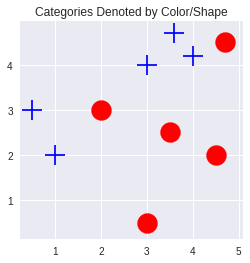

df:
      x    y  classification
0  0.5  3.0               1
1  1.0  2.0               1
2  3.0  0.5              -1
3  2.0  3.0              -1
4  3.0  4.0               1
5  3.5  2.5              -1
6  3.6  4.7               1
7  4.0  4.2               1
8  4.5  2.0              -1
9  4.7  4.5              -1 

threshold: 1.5 feature: 0
threshold: 4.25 feature: 0

tree1 predictions on all elements: [1 1 0 0 0 0 0 0 0 0]
tree2 predictions on all elements: [1 1 1 1 1 1 1 1 0 0]

Entropy of different splits for observations 5-9
under data :  [2.5, 2.0]
up data :  [4.7, 4.2, 4.5]
 classs1 :  [0 1 1 0 1]
 classs2 :  [0 1 1 0 0]
Entorpy : 0
Entorpy : 1.0
Entorpy : 1.0
Entorpy : 0
Entorpy : 0
Col 1, @ 3.35: None
under data :  [3.5, 3.6, 4.0]
up data :  [4.5, 4.7]
 classs1 :  [0 0 0 1 1]
 classs2 :  [0 1 1 0 0]
Entorpy : 0
Entorpy : 0
Entorpy : 0
Entorpy : 0
Entorpy : 0
Col 0, # 4.25: None


In [0]:
### This helper function will return an instance of a `DecisionTreeClassifier` with
### our specifications - split on entropy, and grown to depth of 1.
from sklearn.tree import DecisionTreeClassifier

def simple_tree():
    return DecisionTreeClassifier(criterion = 'entropy', max_depth= 1)


### Our example dataset, inspired from lecture
pts = [[.5, 3,1],[1,2,1],[3,.5,-1],[2,3,-1],[3,4,1],
 [3.5,2.5,-1],[3.6,4.7,1],[4,4.2,1],[4.5,2,-1],[4.7,4.5,-1]]

df = pd.DataFrame(pts, columns = ['x','y','classification'])

# Plotting by category

b = df[df.classification ==1]
r = df[df.classification ==-1]
plt.figure(figsize = (4,4))
plt.scatter(b.x, b.y, color = 'b', marker="+", s = 400)
plt.scatter(r.x, r.y, color = 'r', marker = "o", s = 400)
plt.title("Categories Denoted by Color/Shape")
plt.show()


print("df:\n",df, "\n")

### split out X and y
X = df[['x','y']]

# Change from -1 and 1 to 0 and 1
y = np.array([1 if x == 1 else 0 for x in df['classification']])

### Split data in half
X1 = X.iloc[:len(X.index)//2, :]
X2 = X.iloc[len(X.index)//2:, :]

y1 = y[:len(y)//2]
y2 = y[len(X)//2:]


### Fit classifier to both sets of data, save to dictionary:

tree_dict = {}

tree1 = simple_tree()
tree1.fit(X1,y1)
print("threshold:", tree1.tree_.threshold[0], "feature:", tree1.tree_.feature[0])

### made up alpha, for example
alpha1 = .6
tree_dict[1] = (tree1, alpha1)

tree2 = simple_tree()
tree2.fit(X2,y2)
print("threshold:", tree2.tree_.threshold[0], "feature:" ,tree2.tree_.feature[0])

### made up alpha, again.
alpha2 = .35

tree_dict[2] = (tree2, alpha2)

### Create predictions using trees stored in dictionary
print("\ntree1 predictions on all elements:", tree_dict[1][0].predict(X))
print("tree2 predictions on all elements:", tree_dict[2][0].predict(X))

### Showing Ent
print("\nEntropy of different splits for observations 5-9")
print("Col 1, @ 3.35:", ent_from_split(X2.iloc[:,1].values,3.35, y2))
print("Col 0, # 4.25:", ent_from_split(X2.iloc[:,0].values, 4.25, y2))

Running the above cell a number of times, you might notice that the threshold and feature for `tree2` change.  

At the bottom of the cell, the entropy for two different splits is shown to be identical. This is unlikely to happen with "real" data.  

#### Bootstrapping

Taking a bootstrap sample in adaptive boosting requires selecting observation with pre-defined probabilities.  


Below offers an example of selecting random numbers with numpy given pre-defined probabilities.  

This will be done with `np.random.choice()`, documentation below: <br>
![alt text](https://proxy.vocareum.com/hostip/172.31.21.54:6000/user/ccc_v1_w_9afec_22293_176623_176623_41165_0/notebooks/assets/npChoicProbs.PNG)  

Try running the below cell a few times, to gain a sense of how `.choice()` works while passing a value for the `<p>` argument.

In [0]:
select_from = list(range(5))
print("selecting from:", select_from, "\n")

### Implement 1/n weights (which is the np.random.choice default)
### Also note:
### replace = True (default, used for boot-strapping)
### size = len(array) - This will be the sample size used in our algorithms.

print("Equal Weights:\n",
    np.random.choice(select_from,
                size = len(select_from),
                replace = True,
                p = np.array([.2,.2,.2,.2,.2,])
                )
)

### Now, using uneven weights

print("\nWeights of [.9,.05,.03,.02,0]:\n",
    np.random.choice(select_from,
                size = len(select_from),
                p = np.array([.9,.05,.03,.02,0]))
)

selecting from: [0, 1, 2, 3, 4] 

Equal Weights:
 [0 2 3 4 1]

Weights of [.9,.05,.03,.02,0]:
 [0 0 0 0 0]


### Building Adaptive Boosting

Below Gives the outline of the fitting process for the adaptive boosting algorithm.  

Again, the functions next to "`###<------`" will be created in the exercises below. They include:  

- `default_weights()`
- `calc_epsilon()`
- `calc_alpha()`
- `update_weights()`

In [0]:
def simple_adaboost_fit(X,y, n_estimators):
    """
    Positional arguments :
        X -- a numpy array of numeric observations:
            rows are observations, columns are features
        y -- a numpy array of binary labels:
            *Assume labels are 1 for "True" and 0 for "False"*
        estimator -- a model capable of binary classification, implementing
            the `.fit()` and `.predict()` methods.
        n_estimators -- The number of estimators to fit.

    Steps:
        1. Create probability weights for selection during boot-straping.
        2. Create boot-strap sample of observations according to weights
        3. Fit estimator model with boot-strap sample.
        4. Calculate model error: epsilon
        5. Calculate alpha to associate with model
        6. Re-calculate probability weights
        7. Repeat 2-6 unil creation of n_estimators models. 

    """
    
    def simple_tree():
        return DecisionTreeClassifier(criterion = 'entropy', max_depth= 1)
    
    # Create default weights array where all are equal to 1/n
    weights = default_weights(len(y)) ### <------
    
    est_dict = {}
    for i in range(n_estimators):
        # Create bootstrap sample
        bs_X, bs_y = boot_strap_selection(X, y, weights)
        
        mod = simple_tree()
        mod.fit(bs_X, bs_y)
        
        # Note: Predicting on all values of X, NOT boot-strap
        preds = mod.predict(X)
        
        epsilon = calc_epsilon(y, preds, weights) ### <------
        alpha = calc_alpha(epsilon) ### <------
        
        # Note that the i+1-th model will be keyed to the int i,
        # and will store a tuple of the fit model and the alpha value
        est_dict[i] = (mod, alpha)
        
        weights = update_weights(weights, alpha, y, preds) ### <------
    
    return est_dict 

#### Question 5
Creating vector of default weights

In [0]:
### GRADED
### Code a function called 'default_weights
### ACCEPT a single integer, `n`,  as input
### RETURN default weights; a numpy array of lenth n, where each value is equal to 1/n

### YOUR ANSWER BELOW

def default_weights(n):
    """
    Create the default list of weights, a numpy array of length n
    with each value equal to 1/n
    
    Example:
        n = 10
        dw = default_weights(n)
        print(dw) #--> np.array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])
        
    """
    
    return np.full(n,1/n)

In [0]:
#
# AUTOGRADER TEST - DO NOT REMOVE
#


#### boot_strap_selection  

Below, the "`boot_strap_selection`" algorithm is provided. The function creates a boot-strap sample given the passed-in weights.  

Example given

In [0]:
def boot_strap_selection(X, y, weights):
    """
    Create and return a boot-strapped sample of the given data,
    According to the provided weights.
    
    Positional Arguments:
        X -- a numpy array, corresponding to the matrix of x-observations
        y -- a numpy array, corresponding to a vector of y-labels
            All either 0 or 1
        weights -- a numpy array, corresponding to the rate at which the observations
            should be sampled for the boot-strap. 
            
    Example: 
    
        X = np.array([[1,1],[2,2],[3,3],[4,4],[5,5]])
        y = np.array([1,0,1,0,1])
        weights = np.array([.35,.1,.1,.35,.1])
        
        print(boot_strap_selection(X,y, weights))
        #-->(
            np.array([[4, 4],
                   [2, 2],
                   [4, 4],
                   [5, 5],
                   [5, 5]]),
            np.array([0, 0, 0, 1, 1]))
        ### Actual results will vary
    """
    
    # Take random sample of indicies, with replacement
    bss_indicies = np.random.choice(range(len(y)), size = len(y), p = weights)
    
    # Subset arrays with indicies
    return X[bss_indicies,:], y[bss_indicies]

### Example of use
X = np.array([[1,1],[2,2],[3,3],[4,4],[5,5]])
y = np.array([1,0,1,0,1])
weights = np.array([.35,.1,.1,.35,.1])

print(boot_strap_selection(X,y, weights))    

#### Question 6
Calculating Epsilon

The Epsilon is equal to:  
$$\epsilon_t = \sum_{i=1}^nw_t(i)\mathbb{1}\{y_i\ne f_t(x_i)\}$$  

In [0]:
### GRADED
### Code a function called `calc_epsilon` 
### ACCEPT three inputs:
### 1. The True labels
### 2. The Predicted labels
### 3. The current Weights

### RETURN the epsilon value, calculated according to the above equation.
### ### Will be a float between 0 and 1

### The epsilon is the sum of the weights where the true-label DOES NOT EQUAL the predicted-label

### YOUR ANSWER BELOW

def calc_epsilon(y_true, y_pred, weights):
    
    """
    Calculate the value of epsilon, given the above equation 
    
    Positional Arguments:
        y_true -- An np.array of 1's and 0's corresponding to whether each observation is
            a member of class 1 or class 2
        y_pred -- An np.array of 1's and 0's corresponding to whether each observation was
            predicted to be a member of class 1 or class 2
        weights -- An np.array of floats corresponding to each observation's weight. 
            All the weights will sum up to 1.
            
    Example:
        y_true = np.array([1,0,1,1,0])
        y_pred = np.array([0,0,0,1,0])
        weights = np.array([.4,.4,.1,.05,.05])
        
        ep = calc_epsilon(y_true, y_pred, weights)
        
        print(ep) # --> .5
        
    Assumptions:
        Assume both the true labels and the predictions are both all 0's and 1's.
    """
    return float()
    

In [0]:
y_true = np.array([1,0,1,1,0])
y_pred = np.array([0,0,0,1,0])
weights = np.array([.4,.4,.1,.05,.05])

def calc_epsilon(y_true, y_pred, weights):
  ep=0
  for i in range(len(y_true)):
    if y_true[i] != y_pred[i]:
      print("hera : ",weights[i],i)
      ep+=weights[i]
    
  return ep
        
ep = calc_epsilon(y_true, y_pred, weights)
        
print(ep) # --> .5

hera :  0.4 0
hera :  0.1 2
0.5


In [0]:
#
# AUTOGRADER TEST - DO NOT REMOVE
#


#### Question 7
Calculating alpha.

Alpha is equal to:
$$\alpha_t = \frac12ln(\frac{1-\epsilon_t}{\epsilon_t})$$  

In [0]:
### GRADED
### Code a function called `calc_alpha`
### ACCEPT a non-negative float (epsilon) as input
### RETURN the alpha (float) calculated using the equation above.
### HOWEVER, if epsilon equals 0, return np.inf

### NB: np.log() calculates the natural log

### YOUR ANSWER BELOW

def calc_alpha(epsilon):
    """
    Calculate the alpha value given the epsilon observed from a model
    
    Positional Argument:
        epsilon -- The epsilon value calculated from a particular model
    Example:
        ep = .4
        alpha = calc_alpha(ep)
        print(alpha) # --> 0.2027325540540821
    """
    if epsilon == 0:
      return np.inf
    
    return float(np.log((1-epsilon)/epsilon) / 2)
    
   

In [0]:
ep = .4

def calc_alpha(epsilon):
  if epsilon == 0:
    return np.inf
  
  return (np.log((1-epsilon)/epsilon) / 2)


alpha = calc_alpha(ep)
print(alpha) # --> 0.2027325540540821

0.2027325540540821


In [0]:
#
# AUTOGRADER TEST - DO NOT REMOVE
#


#### Question 8
Updating weights

To update weights:
$$w_{t+1}(i) = \frac{\hat{w}_{t+1}(i)}{\sum_j\hat{w}_{t+1}(j)}$$  

Where:
$$\hat{w}_{t+1}(i) = w_t(i)e^{-\alpha_ty_if_t(x_i)}$$

In [0]:
### GRADED
### Code a function "update_weights"
### ACCEPT four inputs:
### 1. A numpy array of a weight vector
### 2. An alpha value (float)
### 3/4. numpy arrays of true labels and predicted labels vectors.

### NB: Labels will need to be converted from 0s and 1s to -1s and 1s

### RETURN an updated array of weights, according to equation above.

### YOUR ANSWER BELOW

def update_weights(weights, alpha, y_true, y_pred):
    """
    Create an updated vector of weights according to the above equations
    
    Positional Arguments:
        weights -- a 1-d numpy array of positive floats, corresponding to 
            observation weights
        alpha -- a positive float
        y_true -- a 1-d numpy array of true labels, all 0s and 1s
        y_pred -- a 1-d numpy array of labels predicted by the last model;
             all 0s and 1s. 
    
    Example:
        y_true = np.array([1,0,1,1,0])
        y_pred = np.array([0,0,1,1,1])
        weights = np.array([.4,.4,.1,.05,.05])
        alpha = 0.10033534773107562
        
        print(update_weights(weights, alpha, y_true, y_pred))
        #-->np.array([0.44444444 0.36363636 0.09090909 0.04545455 0.05555556])
        
    """
    # Doesn't work np.place()  to convert 1's & 0's to 1's & -1's
    y_true[y_true == 0] = -1
    y_pred[y_pred == 0] = -1
    
    weight_t = weights * np.e**(-alpha*y_true*y_pred)
    
    return (weight_t/sum(weight_t))
  

In [0]:
y_true = np.array([1,0,1,1,0])
y_pred = np.array([0,0,1,1,1])
weights = np.array([.4,.4,.1,.05,.05])
alpha = 0.10033534773107562

def update_weights(weights, alpha, y_true, y_pred):
    
  # Doesn't work np.place()  to convert 1's & 0's to 1's & -1's
  y_true[y_true == 0] = -1
  y_pred[y_pred == 0] = -1

  weight_t = weights * np.e**(-alpha*y_true*y_pred)
  
  return (weight_t/sum(weight_t))
        
print(update_weights(weights, alpha, y_true, y_pred))
        #-->np.array([0.44444444 0.36363636 0.09090909 0.04545455 0.05555556])

[0.44444444 0.36363636 0.09090909 0.04545455 0.05555556]


In [0]:
#
# AUTOGRADER TEST - DO NOT REMOVE
#


With the above functions created, the "`simple_adaboost_fit()`" method should work correctly.  

`simple_adaboost_fit()` returns a dictionary where the keys are 0 through n-1 where n is the `n_estimators` from the function signature.  

The values of the dictionaries are (model, alpha) where `model`is a `DecisionTreeClassifier`, and `alpha` is a float.  

#### Question 9
Creating a Prediction from boosted trees

Our prediction will be:  

$$f_{boost}(x_0) = sign(\sum_{t=1}^T\alpha_tf_t(X_0))$$  

In [0]:
### GRADED
### Code a function called `predict`

### ACCEPT two inputs:
### 1. a 2-d numpy array of x-obervations
### 2. a dictionary that contains classifiers and alphas (described more below and above)

### Combine the models as in the manner described in the equation above
### to create predictions for the observations.

### RETURN a 1-d numpy array of observations (all 0s and 1s)

### YOUR ANSWER BELOW

def predict(X, est_dict):
    """
    Create a np.array list of predictions for all of the observations in x,
    according to the above equation.
    
    Positional Arguments:
        X -- a 2-d numpy array of X observations. Features in columns, 
            observations in rows.
        est_dict -- a dictionary consists of keys 0 through n with tuples as values
            The tuples will be (<mod>, alpha), where alpha is a float, and 
            <mod> is a sklearn DecisionTreeClassifier
    Example:
    
        ### Our example dataset, inspired from lecture
        pts = [[.5, 3,1],[1,2,1],[3,.5,0],[2,3,0],[3,4,1],
         [3.5,2.5,0],[3.6,4.7,1],[4,4.2,1],[4.5,2,0],[4.7,4.5,0]]

        df = pd.DataFrame(pts, columns = ['x','y','classification'])
        
        ### split out X and labels
        X = df[['x','y']]
        y = df['classification']
        ### Split data in half
        X1 = X.iloc[:len(X.index)//2, :]
        X2 = X.iloc[len(X.index)//2:, :]

        y1 = y[:len(y)//2]
        y2 = y[len(X)//2:]


        ### Fit classifiers to both sets of data, save to dictionary:
        
        ### Tree-creator helper function
        def simple_tree():
            return DecisionTreeClassifier(criterion = 'entropy', max_depth= 1)
            
        tree_dict = {}

        tree1 = simple_tree()
        tree1.fit(X1,y1)
        print("threshold:", tree1.tree_.threshold[0], "feature:", tree1.tree_.feature[0])

        ### made up alpha, for example
        alpha1 = .6
        tree_dict[1] = (tree1, alpha1)

        tree2 = simple_tree()
        tree2.fit(X2,y2)
        print("threshold:", tree2.tree_.threshold[0], "feature:" ,tree2.tree_.feature[0])
        
        ### made up alpha, again.
        alpha2 = .35
        tree_dict[2] = (tree2, alpha2)
    
        print(predict(X, tree_dict))
        #--> np.array([1., 1., 0., 0., 0., 0., 0., 0., 0., 0.])
        
        ###############################
        ### For Further Checking of your function:
        ### The sum of predictions from the two models should be:
        
        # If tree2 splits on feature 1:
        # np.array([ 0.25  0.25 -0.95 -0.95 -0.25 -0.95 -0.25 -0.25 -0.95 -0.25])
        
        # If tree2 splits on feature 0:
        # np.array([ 0.95  0.95 -0.25 -0.25 -0.25 -0.25 -0.25 -0.25 -0.95 -0.95])
        ###############################
        
    Assumptions:
        The models in the `est-dict` tuple will return 0s and 1s.
            HOWEVER, the prediction equation depends upon predictions
            of -1s and 1s.
            FINALLY, the returned predictions should be 0s and 1s.            
    """
    f_pred = np.zeros(X.shape[0])
    
    for i in est_dict:
      pred = est_dict[i][0].predict(X)
      pred[pred<1] = -1
      
      pred = pred * est_dict[i][1]
      
      f_pred += pred
      
      
    f_pred[f_pred >= 0 ] = 1
    f_pred[f_pred <   0] = 0
    
        
    return f_pred


In [0]:
from sklearn.tree import DecisionTreeClassifier

### Our example dataset, inspired from lecture
pts = [[.5, 3,1],[1,2,1],[3,.5,0],[2,3,0],[3,4,1],[3.5,2.5,0],[3.6,4.7,1],[4,4.2,1],[4.5,2,0],[4.7,4.5,0]]

df = pd.DataFrame(pts, columns = ['x','y','classification'])
        
### split out X and labels
X = df[['x','y']]
y = df['classification']

### Split data in half
X1 = X.iloc[:len(X.index)//2, :]
X2 = X.iloc[len(X.index)//2:, :]

y1 = y[:len(y)//2]
y2 = y[len(X)//2:]


### Fit classifiers to both sets of data, save to dictionary:
        
### Tree-creator helper function
def simple_tree():
  return DecisionTreeClassifier(criterion = 'entropy', max_depth= 1)
            
tree_dict = {}

tree1 = simple_tree()
tree1.fit(X1,y1)
print("threshold:", tree1.tree_.threshold[0], "feature:", tree1.tree_.feature[0])

### made up alpha, for example
alpha1 = .6
tree_dict[1] = (tree1, alpha1)

tree2 = simple_tree()
tree2.fit(X2,y2)
print("threshold:", tree2.tree_.threshold[0], "feature:" ,tree2.tree_.feature[0])
        
### made up alpha, again.
alpha2 = .35
tree_dict[2] = (tree2, alpha2)

def predict(X, est_dict):
  
  f_pred = np.zeros(X.shape[0])
    
  for i in est_dict:
    pred = est_dict[i][0].predict(X)
    pred[pred<1] = -1
    
    pred = pred * est_dict[i][1]
      
    f_pred += pred
      
      
  f_pred[f_pred >= 0 ] = 1
  f_pred[f_pred <   0] = 0
    
  return f_pred
 

print(predict(X, tree_dict))
#--> np.array([1., 1., 0., 0., 0., 0., 0., 0., 0., 0.])

# If tree2 splits on feature 1:
# np.array([ 0.25  0.25 -0.95 -0.95 -0.25 -0.95 -0.25 -0.25 -0.95 -0.25])
        
# If tree2 splits on feature 0:
# np.array([ 0.95  0.95 -0.25 -0.25 -0.25 -0.25 -0.25 -0.25 -0.95 -0.95])

threshold: 1.5 feature: 0
threshold: 3.3499999046325684 feature: 1
[1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [0]:
#
# AUTOGRADER TEST - DO NOT REMOVE
#


### Census Data
This assignment will use the [**`Census Income Data`**](https://archive.ics.uci.edu/ml/datasets/census+income) from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.html). A thorough description of the data and its features may be accessed either at the link above, or [this text file](https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names).  

In particular, this classification attempts to predict whether or not a particular census respondant has an income of more or less than $50,000.  
  
#### The Data

In [0]:
col_names = [
"age", "workclass", "fnlwgt", "education",
"education-num", "marital-status", "occupation", "relationship",
"race", "sex", "capital-gain", "capital-loss", "hours-per-week",
"native-country", "income"
]

data_path = "../resource/asnlib/publicdata/adult.data"

data = pd.read_csv(data_path, header = None, names = col_names)
data.head()

Taking a subset of the data relevant to the prediction problem.

In [0]:
cols = ["age", "workclass", "education-num", "occupation", "sex", "hours-per-week", "income"]
data = data[cols]
data.head()

A quick look at the data:

In [0]:
data.describe(include = 'all')

In [0]:
plt.figure(figsize=(10,10))
for i, col in enumerate(data.drop("hours-per-week", axis = 1)):
    d = data[col].value_counts().sort_index()
    plt.bar(d.index, d)
    plt.xticks(rotation = 90)
    plt.title(col)
    plt.show()

plt.hist(data['hours-per-week'], bins = 20);
plt.title("Hours Per Week");

#### Question 10

In [0]:
### GRADED
### The target variable of income over/under $50k is _________
### 'a') mostly balanced
### 'b') unbalanced
### Assign character associated with your choice as string to ans1
### YOUR ANSWER BELOW

ans1 = 'b'

In [0]:
#
# AUTOGRADER TEST - DO NOT REMOVE
#


#### Preprocessing
The following cells  demonstrates the functions used in preprocessing, concluding with the division of data into a training and testing sets, that are then preprocessed.  

##### Dummy Variables

In the creation of dummy variables, the most frequently occuring class will be dropped as a way of avoiding multicollinearity.  

Thus, for **`n`** categories, **`n-1`** features will be created. Below demonstrates finding the most frequent category.

In [0]:
val_count = data['workclass'].value_counts()
print('All Value Counts:')
print(val_count)

top = val_count[0]
print("\nTop category:", top)

#### Question 11

In [0]:
### GRADED
### In the above, the top category is obtained by making a reference
### to the `.index` attribute.
### What would result from instead calling val_count[0]

### 'a') The observed frequency of that top term
### 'b') The result would be the same
### 'c') an error would be thrown: `.iloc[0]` is needed
### Assign the character associated with your choice as a string to ans1

### YOUR ANSWER BELOW
ans1 = 'a'

In [0]:
#
# AUTOGRADER TEST - DO NOT REMOVE
#


##### One Hot Encoder  

Dummies will be created using `sklearn`'s `OneHotEncoder`.  The following cell demonstrates fitting and transforming data using the One Hot Encoder.

In [0]:
from sklearn.preprocessing import OneHotEncoder

ex_df = pd.DataFrame(
    np.array([['b', 'a', 'c', 'a', 'c',], ["z","y","y","y","z"]]).T,
    columns = ["beg","end"],
    index = range(500,505))

test_df = pd.DataFrame(
    np.array([["c","b"],["y","y"]]).T,
    columns = ["beg","end"],
    index = [56,72])

print("Initial DataFrame:")
print(ex_df)

print("\nTest df")
print(test_df)

In [0]:
# Instantiate OneHotEncoder
# sparse = False means data will not be stored in sparse matrix
ohe = OneHotEncoder(sparse = False)

# Fitting OHE with the "training" data
ohe.fit(ex_df)

# Transforming the "training" dat
tr_vals = ohe.transform(ex_df)

print("\nTransformed values")
print(tr_vals)

print("\nCategories")
print(ohe.categories_)

# Creating column names from `.categories_`
ohe_cats = np.concatenate(ohe.categories_)

# In creation of new df. Note the use of np.concatenate
final_df = pd.DataFrame(tr_vals, columns = ohe_cats)

print("\nFinal DataFrame")
print(final_df)

# Putting everything together to transform test data
print("\nTransformed test df")
print(pd.DataFrame(ohe.transform(test_df), columns= ohe_cats))

#### Question 12

In [0]:
### GRADED
### True or False:
### The OneHotEncoder preserves the index of a DataFrame

### Assign Boolean choice to ans1

### YOUR ANSWER BELOW

ans1 = False

In [0]:
#
# AUTOGRADER TEST - DO NOT REMOVE
#


##### LabelEncoder

`sklearn`'s `LabelEncoder` will be used to transform our income variable from strings to 0s and 1s.  

Demonstrated below:

In [0]:
from sklearn.preprocessing import LabelEncoder

# Create target Series
target_train = pd.Series(np.random.choice(data['income'].unique(), size = 10))
target_test = pd.Series(np.random.choice(data['income'].unique(), size = 5))
print("Target Train Series")
print(target_train)

print("\nTarget Test Series")
print(target_test)

In [0]:
# Instantiate encoder
le = LabelEncoder()

# Fit with training data
le.fit(target_train)

# Transform training and test data
trans_train = le.transform(target_train)
trans_test = le.transform(target_test)

print("Transformed training values")
print(trans_train)

print("\nTransformed test values")
print(trans_test)

print("\nLabelEncoder `.classes_`")
print(le.classes_)

##### Define a custom preprocessing function
Using the processes demonstrated above, a function is created to preprocess the census data.  

The function is then used to create a training and testing dataset

In [0]:
def preprocess_census(X_train, X_test, y_train, y_test):

    ### Hardcode variables which need categorical encoding
    to_encode = ["workclass", "occupation", "sex"]

    ### Find top categories in categorical columns
    ### Used for dropping majority class to prevent multi-colinearity
    top_categories = []

    for col in to_encode:
        top_categories.append(X_train[col].value_counts().index[0])

    ### Create and fit one-hot encoder for categoricals
    OHE = OneHotEncoder(sparse = False)
    OHE.fit(X_train[to_encode])

    ## Create and fit Label encoder for target
    LabEnc = LabelEncoder()
    LabEnc.fit(y_train)

    def create_encoded_df(X, to_encode = to_encode, OHE = OHE, top_categories = top_categories):
        # Return columns which need encoding.
        def return_encoded_cols(X, to_encode = to_encode, OHE = OHE, top_categories = top_categories):
            # Use onehotencoder to transform.
            # Use "categories" to name
            toRet = pd.DataFrame(OHE.transform(X[to_encode]), columns = np.concatenate(OHE.categories_))

            # Drop top_categories and return
            return toRet.drop(top_categories, axis = 1)

        # create encoded columns
        ret_cols = return_encoded_cols(X)

        # Drop columns that were encoded
        dr_enc = X.drop(to_encode, axis = 1)

        # Concatenate values
        # use index from original data
        # use combined column names
        return pd.DataFrame(np.concatenate([ret_cols.values, dr_enc.values],axis = 1),
                            index = dr_enc.index,
                            columns = list(ret_cols.columns) + list(dr_enc.columns))


    def encode_target(y, LabEnc = LabEnc):
        # Use label encoder, and supply with original index
        return pd.Series(LabEnc.transform(y), index= y.index)

    return create_encoded_df(X_train), create_encoded_df(X_test), encode_target(y_train), encode_target(y_test)

In [0]:
from sklearn.model_selection import train_test_split

# Create training and testing sets; preprocess them.
target = data['income']
predictors = data.drop("income", axis = 'columns')

X_train, X_test, y_train, y_test = preprocess_census(*train_test_split(predictors, target, test_size = .2))

### Fitting Models to Data  

If the above functions are defined correctly, the following cells should work; creating predictions from your adaptive-boosted model.

Try playing around with the number of estimators

In [0]:
from sklearn.metrics import classification_report
d = simple_adaboost_fit(X_train.values.copy(), y_train.values.copy(), 50)
preds = predict_T(X_test, d)
print(classification_report(y_test,preds))

This image gives an idea of how the precision and recall on both the training and test set changes as the number of estimators is changed.  

![alt text](https://proxy.vocareum.com/hostip/172.31.19.231:6000/user/ccc_v1_w_9afec_22293_176623_176623_41165_0/notebooks/assets/PreRedEst.PNG)

<a id = "sklearn"></a>
### `sklearn` Implementation of Adaptive Boosting

In [0]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier

RF = RandomForestClassifier(n_estimators = 50)
RF.fit(X_train, y_train)

print("Random Forest:\n")
print(classification_report(y_test, RF.predict(X_test)))
ABC = AdaBoostClassifier(n_estimators = 50)
ABC.fit(X_train, y_train)
print("\nAdaBoost:\n")
print(classification_report(y_test, ABC.predict(X_test)))

You should find that the precision and recall of the your custom Adaptive Boosting are very similar to the `sklearn` adaboost.

Notice the higher precision of the AdaBoost compared to the Random Forest